## Final Test-Set Evaluation Notebook
### Random Forest Training Model

Based on cross-validation results in the optimization stages, Random Forest as selected as the best model due to its performance:

* Training MSE: 0.2568
* Training R²: 0.8921

Other models showed significantly higher MSE and lower R² values.

In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

# set random seed for reproducibility
np.random.seed(1234)


In [2]:
# load the data
X_train = pd.read_csv("../Data/X_train.csv")
y_train = pd.read_csv("../Data/y_train.csv")

X_test = pd.read_csv("../Data/X_test.csv")
y_test = pd.read_csv("../Data/y_test.csv")

print("Training data shape")
print(f"X_train: {X_train.shape}\ny_train: {y_train.shape}\n")
print("Test data shape")
print(f"X_test: {X_test.shape}\ny_test: {y_test.shape}\n")

print("First few rows of training data:")
display(X_test.head())


Training data shape
X_train: (400, 9)
y_train: (400, 1)

Test data shape
X_test: (100, 9)
y_test: (100, 1)

First few rows of training data:


,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform
0,U068,22,Male,5.2,9.0,7.0,5.0,1.0,TikTok
1,U417,46,Male,8.0,4.0,8.0,3.0,2.0,Facebook
2,U351,16,Other,7.3,5.0,9.0,0.0,2.0,Instagram
3,U359,47,Male,7.4,6.0,7.0,5.0,2.0,LinkedIn
4,U113,37,Female,4.3,6.0,8.0,3.0,5.0,LinkedIn


In [3]:
# preprocessing (drop id, label encode categorical variables)

# Identify categorical features (same as training)
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical features identified: {categorical_features}")

# Create copies for encoding
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# Initialize label encoders dictionary
label_encoders = {}

# Encode categorical features using the same encoding as training
for col in categorical_features:
    if col != 'User_ID':  # Skip User_ID as before
        # Fit encoder on training data
        le = LabelEncoder()
        X_train_encoded[col] = le.fit_transform(X_train[col])
        X_test_encoded[col] = le.transform(X_test[col])
        label_encoders[col] = le

# Remove User_ID column if present (as done in training)
if 'User_ID' in X_train_encoded.columns:
    X_train_encoded = X_train_encoded.drop('User_ID', axis=1)
    X_test_encoded = X_test_encoded.drop('User_ID', axis=1)

# Convert target variables to 1D arrays
y_train_encoded = y_train.values.ravel()
y_test_encoded = y_test.values.ravel()

print("\nPreprocessing completed.")
print(f"Encoded X_train shape: {X_train_encoded.shape}")
print(f"Encoded X_test shape: {X_test_encoded.shape}")

print(f"\nEncoded Test Data Preview:")
display(X_test_encoded.head())

Categorical features identified: ['User_ID', 'Gender', 'Social_Media_Platform']

Preprocessing completed.
Encoded X_train shape: (400, 8)
Encoded X_test shape: (100, 8)

Encoded Test Data Preview:


,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform
0,22,1,5.2,9.0,7.0,5.0,1.0,3
1,46,1,8.0,4.0,8.0,3.0,2.0,0
2,16,2,7.3,5.0,9.0,0.0,2.0,1
3,47,1,7.4,6.0,7.0,5.0,2.0,2
4,37,0,4.3,6.0,8.0,3.0,5.0,2


In [4]:
# insert best params from cross-validation

best_params = {
    'n_estimators': 200,
    'max_depth': 10,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'random_state': 42
}

print("Optimal hyperparameters from cross-validation:")
print(best_params)

Optimal hyperparameters from cross-validation:
{'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2, 'random_state': 42}


In [5]:
# initialize and train best model on training set

print("\nTraining final Random Forest model on entire training set...")
final_rf = RandomForestRegressor(**best_params)
final_rf.fit(X_train_encoded, y_train_encoded)

# Evaluate on training set (for reference)
y_train_pred = final_rf.predict(X_train_encoded)
train_mse = mean_squared_error(y_train_encoded, y_train_pred)
train_r2 = r2_score(y_train_encoded, y_train_pred)
train_mae = mean_absolute_error(y_train_encoded, y_train_pred)

print("\nTraining set performance (for reference):")
print(f"  Mean Squared Error (MSE): {train_mse:.4f}")
print(f"  R-squared (R²): {train_r2:.4f}")
print(f"  Mean Absolute Error (MAE): {train_mae:.4f}")


Training final Random Forest model on entire training set...

Training set performance (for reference):
  Mean Squared Error (MSE): 0.2568
  R-squared (R²): 0.8921
  Mean Absolute Error (MAE): 0.3786


In [6]:
# Make predictions on test set
y_test_pred = final_rf.predict(X_test_encoded)

# Calculate evaluation metrics
test_mse = mean_squared_error(y_test_encoded, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_encoded, y_test_pred)
test_mae = mean_absolute_error(y_test_encoded, y_test_pred)
residuals = y_test_encoded - y_test_pred

print("Test Set Evaluation Metrics:\n")
print(f"Mean Squared Error (MSE): {test_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.4f}")
print(f"R-squared (R²): {test_r2:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae:.4f}")

Test Set Evaluation Metrics:

Mean Squared Error (MSE): 0.7972
Root Mean Squared Error (RMSE): 0.8929
R-squared (R²): 0.6060
Mean Absolute Error (MAE): 0.6621


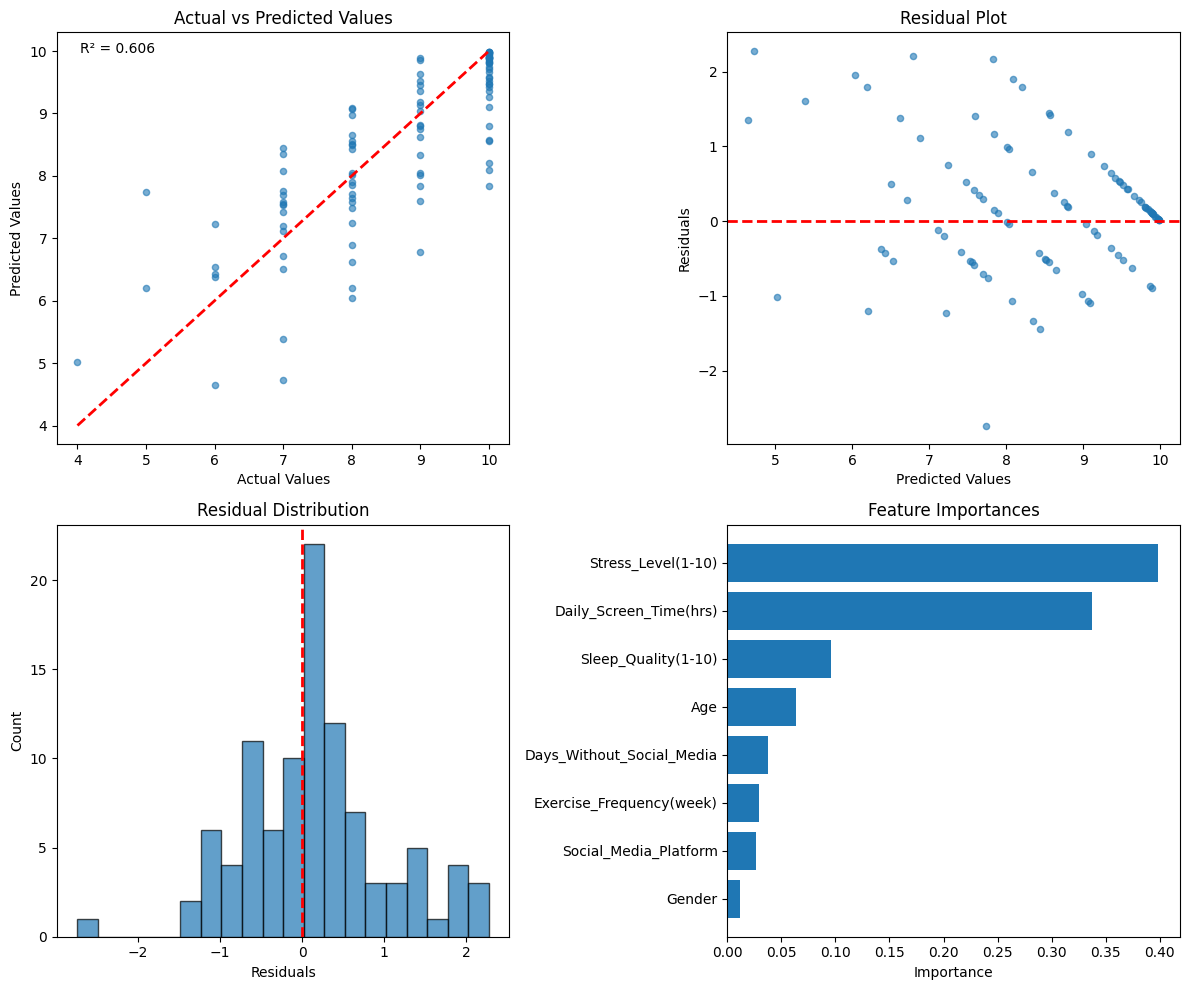

In [7]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Actual vs Predicted values (simple scatter)
axes[0, 0].scatter(y_test_encoded, y_test_pred, alpha=0.6, s=20)
axes[0, 0].plot([y_test_encoded.min(), y_test_encoded.max()], 
                [y_test_encoded.min(), y_test_encoded.max()], 
                'r--', lw=2)
axes[0, 0].set_xlabel('Actual Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title('Actual vs Predicted Values')
axes[0, 0].text(0.05, 0.95, f'R² = {test_r2:.3f}', 
                transform=axes[0, 0].transAxes, fontsize=10)

# 2. Residual plot (simple)
axes[0, 1].scatter(y_test_pred, residuals, alpha=0.6, s=20)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot')

# 3. Distribution of residuals (simple histogram)
axes[1, 0].hist(residuals, bins=20, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Residual Distribution')

# 4. Feature importance (simple horizontal bars)
importances = final_rf.feature_importances_
feature_names = X_train_encoded.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=True)

axes[1, 1].barh(range(len(feature_importances)), feature_importances.values)
axes[1, 1].set_yticks(range(len(feature_importances)))
axes[1, 1].set_yticklabels(feature_importances.index)
axes[1, 1].set_xlabel('Importance')
axes[1, 1].set_title('Feature Importances')

plt.tight_layout()
plt.savefig('../Outputs/final_test_evaluation.png', dpi=150, bbox_inches='tight')
plt.show()

In [8]:
# Create a summary table
summary_data = {
    'Metric': ['Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 
               'R-squared (R²)', 'Mean Absolute Error (MAE)'],
    'Training Set': [f'{train_mse:.4f}', f'{np.sqrt(train_mse):.4f}', 
                     f'{train_r2:.4f}', f'{train_mae:.4f}'],
    'Test Set': [f'{test_mse:.4f}', f'{test_rmse:.4f}', 
                 f'{test_r2:.4f}', f'{test_mae:.4f}']
}

summary_df = pd.DataFrame(summary_data)

print("FINAL MODEL EVALUATION: Random Forest Regressor")
print("\nOptimal Hyperparameters:")
for key, value in best_params.items():
    print(f"  {key}: {value}")

print("\nPerformance Comparison:")
print(summary_df.to_string(index=False))

print("\nKEY INSIGHTS:")
print(f"  Model explains {test_r2*100:.1f}% of variance (R² = {test_r2:.3f})")
print(f"  Test MSE ({test_mse:.3f}) vs Training MSE ({train_mse:.3f})")
print(f"  Top 3 most important features:")
for i, (feature, importance) in enumerate(feature_importances.sort_values(ascending=False).head(3).items(), 1):
    print(f"     {i}. {feature}: {importance:.3f}")

FINAL MODEL EVALUATION: Random Forest Regressor

Optimal Hyperparameters:
  n_estimators: 200
  max_depth: 10
  min_samples_split: 5
  min_samples_leaf: 2
  random_state: 42

Performance Comparison:
                        Metric Training Set Test Set
      Mean Squared Error (MSE)       0.2568   0.7972
Root Mean Squared Error (RMSE)       0.5067   0.8929
                R-squared (R²)       0.8921   0.6060
     Mean Absolute Error (MAE)       0.3786   0.6621

KEY INSIGHTS:
  Model explains 60.6% of variance (R² = 0.606)
  Test MSE (0.797) vs Training MSE (0.257)
  Top 3 most important features:
     1. Stress_Level(1-10): 0.399
     2. Daily_Screen_Time(hrs): 0.337
     3. Sleep_Quality(1-10): 0.096


The explained variance of the model decreased significantly from 89.2% on training data to 60.6% on test data. The test MSE also worsened in comparison to the train MSE, with an increase from 0.257 to 0.797. These metrics indicate substantial performance degradation on unseen data. The performance gap between train and test data suggests the model may be capturing dataset-specific patterns rather than generalizable relationships.

Feature importance analysis reveals Stress_Level as the most predictive feature (0.399), followed closely by Daily_Screen_Time (0.337). The third most important feature has an importance score of 0.096, showing that the two most important features have an incredibly substantial impact on the model's training and other features are significantly less impactful.